<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático  
## Taller 03 - Agrupamiento Jerárquico

---

**Nombre:** Nicolás Nolivos  
**Materia:** Aprendizaje Automático
**Fecha:** Abril 2025

---

📌 En este taller se explorarán técnicas de *clustering jerárquico*, aplicando métodos como **agglomerative clustering**, visualizando dendrogramas y analizando la estructura de los grupos resultantes.

---


<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [25]:
# Paquetes necesarios
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

#### Carga del Archivo

In [6]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


#### Descripción de los datos

A continuación se detallan las variables seleccionadas del conjunto de datos, considerando su relevancia para el análisis de **agrupamiento de transacciones**. Estas variables aportan información sobre el comportamiento, contexto y características de cada transacción, facilitando la detección de patrones o segmentos de interés.

| 🏷️ Columna | 📖 Descripción |
|------------|----------------|
| **TransactionAmount** | Valor monetario de la transacción. Ayuda a identificar comportamientos de gasto. |
| **TransactionType** | Tipo de transacción, ya sea 'Credit' o 'Debit'. Permite distinguir el flujo de dinero. |
| **Location** | Ciudad en EE. UU. donde ocurrió la transacción. Útil para agrupar por comportamiento geográfico. |
| **DeviceID** | Identificador del dispositivo usado. Aporta trazabilidad y puede reflejar hábitos tecnológicos. |
| **MerchantID** | ID único del comerciante involucrado. Permite analizar relaciones comerciales o preferencias. |
| **Channel** | Canal de la transacción (Online, ATM, Sucursal). Importante para segmentar por modo de operación. |
| **CustomerAge** | Edad del cliente. Relevante para segmentación demográfica. |
| **CustomerOccupation** | Ocupación del cliente. Puede influir en patrones de consumo. |
| **TransactionDuration** | Duración de la transacción. Puede reflejar eficiencia o anomalías. |
| **LoginAttempts** | Número de intentos de inicio de sesión previos. Útil para detectar comportamientos inusuales. |
| **AccountBalance** | Saldo de la cuenta al momento de la transacción. Ayuda a comprender la capacidad financiera. |
| **TransactionHour** | Hora en la que se realizó la transacción. Permite detectar hábitos temporales. |
| **TransactionWeekday** | Día de la semana. Puede revelar tendencias según el calendario semanal. |
| **TransactionDay** | Día del mes. Útil para identificar patrones cíclicos dentro del mes. |
| **TransactionMonth** | Mes en que ocurrió la transacción. Ayuda a identificar estacionalidades. |
| **PreviousTransactionDate** | Fecha de la transacción anterior del mismo cliente. Útil para medir frecuencia. |



In [7]:
# 📊 Exploración inicial del DataFrame

print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Tipos de Datos por Columna:\n")
print(df.dtypes)

print("\n🔹 Valores Nulos por Columna:\n")
print(df.isnull().sum())

print("\n🔹 Primeras Filas del DataFrame:\n")
print(df.head())

print("\n🔹 Estadísticos Descriptivos:\n")
print(df.describe())


🔹 Dimensión del DataFrame: (2512, 16)

🔹 Tipos de Datos por Columna:

TransactionAmount          float64
TransactionType             object
Location                    object
DeviceID                    object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
TransactionHour              int64
TransactionWeekday           int64
TransactionDay               int64
TransactionMonth             int64
PreviousTransactionDate     object
dtype: object

🔹 Valores Nulos por Columna:

TransactionAmount          0
TransactionType            0
Location                   0
DeviceID                   0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
Transa

In [24]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance',
    'TransactionHour',
    'TransactionWeekday',
    'TransactionDay',
    'TransactionMonth'
    ]

cat_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation'
    ]

total_cols=numeric_cols+cat_cols

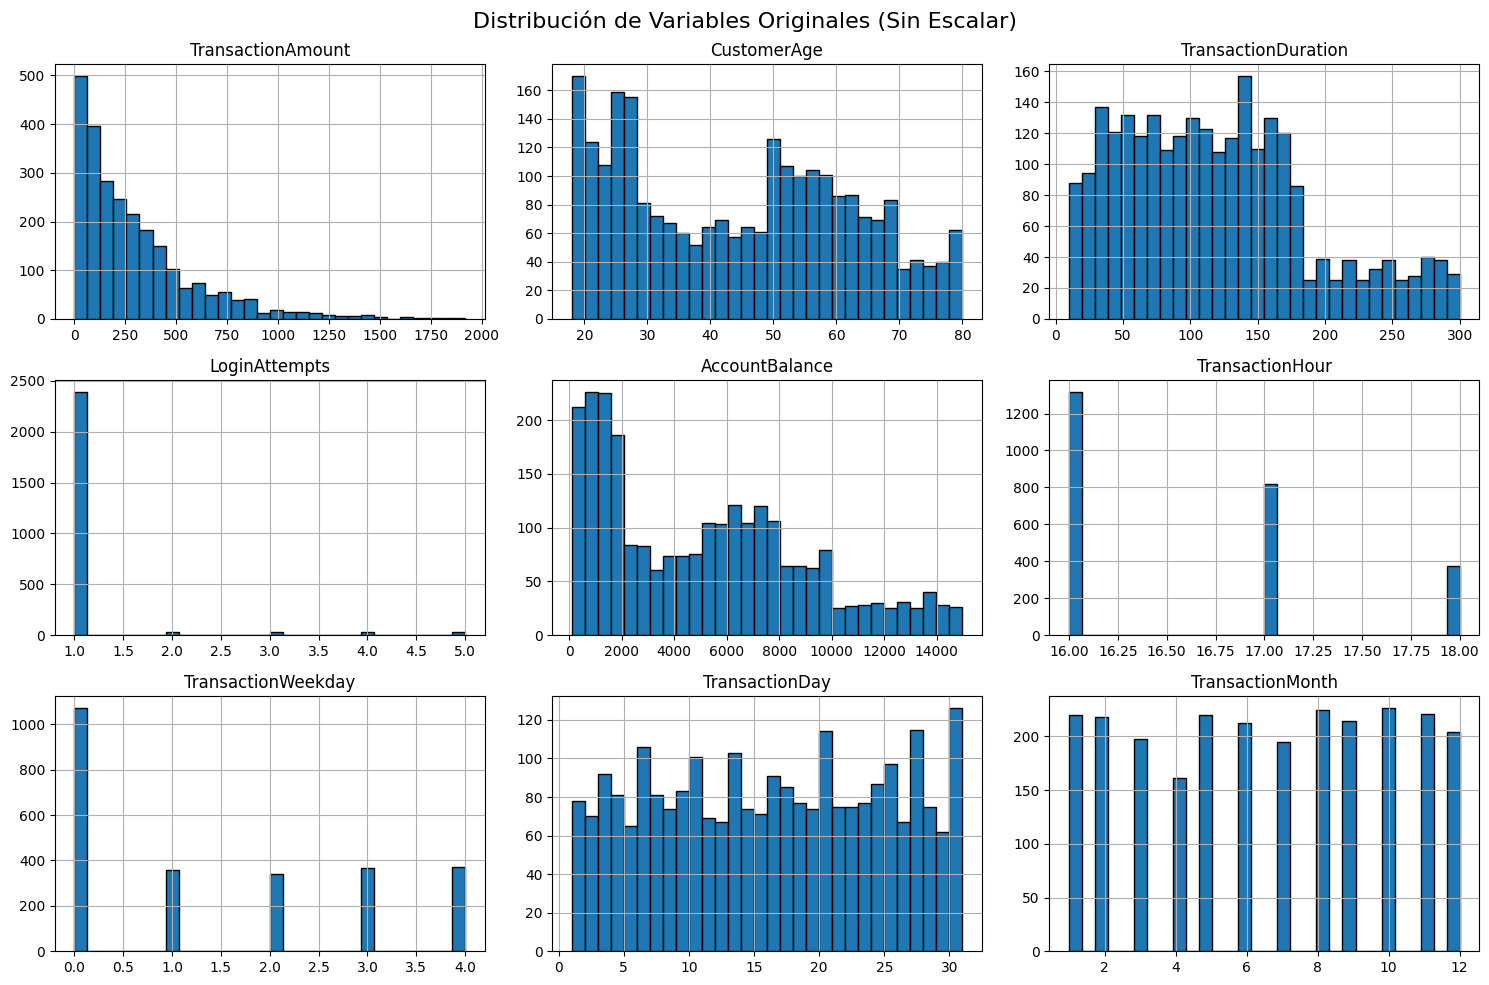

In [20]:
# Gráficos exploratorios
df[numeric_cols].hist(
    figsize=(15, 10),
    bins=30,
    edgecolor='black'
)
plt.suptitle("Distribución de Variables Originales (Sin Escalar)", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-23-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-23-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-23-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


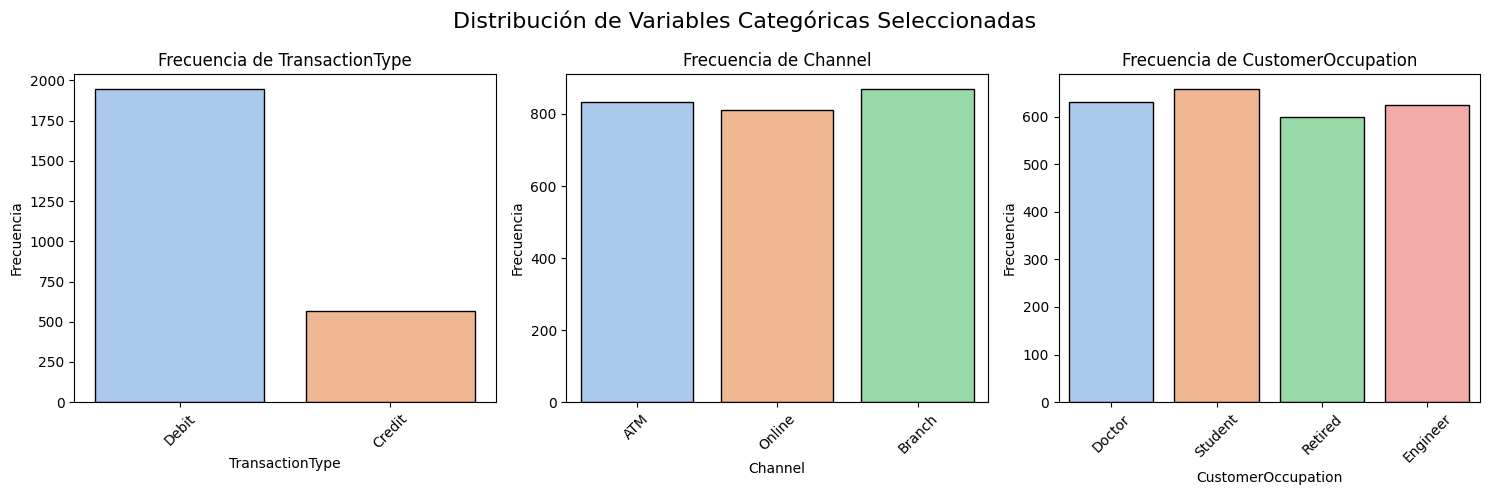

In [23]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

#### Esacalar Datos

In [27]:
# Escalar columnas numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_cols])

# Codificar variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_cat_encoded = encoder.fit_transform(df[cat_cols])

# Crear nombres de columnas codificadas
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_names, index=df.index)

# Combinar numéricas escaladas + categóricas codificadas
X_final = np.hstack([X_num_scaled, X_cat_encoded])

# DataFrame final para explorar visualmente
df_cluster_ready = pd.DataFrame(X_final, columns=[*numeric_cols, *encoded_cat_names])

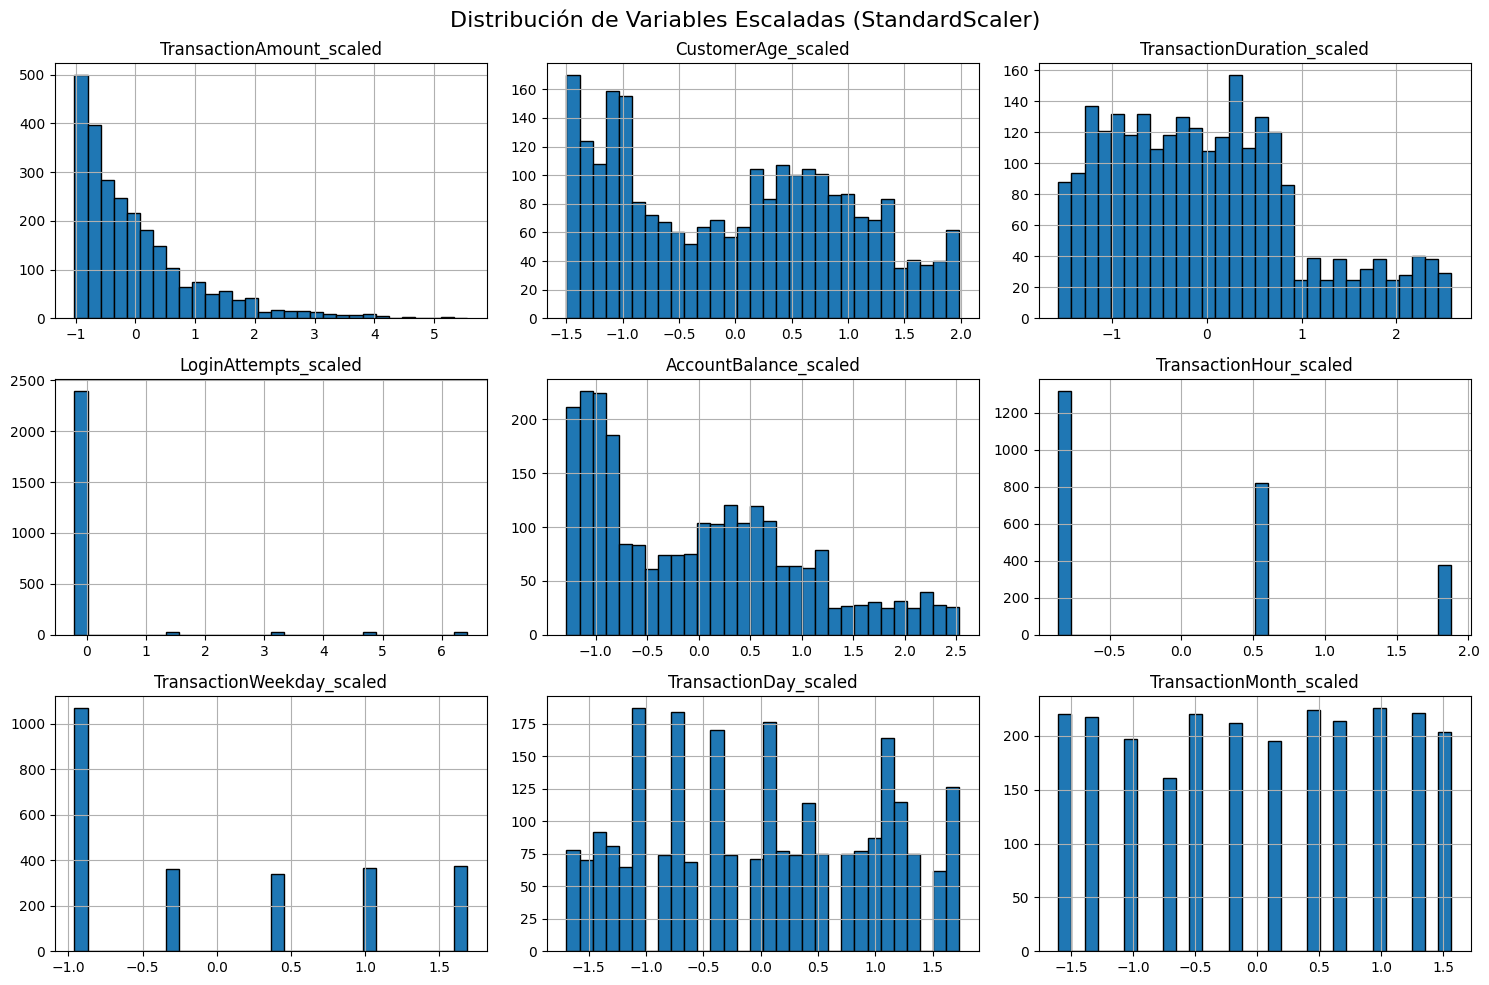

In [12]:
df_scaled_numeric.hist(
    figsize=(15, 10),
    bins=30,
    edgecolor='black'
)
plt.suptitle("Distribución de Variables Escaladas (StandardScaler)", fontsize=16)
plt.tight_layout()
plt.show()


---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

In [13]:
cat_cols = ['TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerOccupation']

for col in cat_cols:
    print(f"\n🔹 {col} ({df[col].nunique()} categorías únicas):")
    print(df[col].unique())



🔹 TransactionType (2 categorías únicas):
['Debit' 'Credit']

🔹 Location (43 categorías únicas):
['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']

🔹 DeviceID (681 categorías únicas):
['D000380' 'D000051' 'D000235' 'D000187' 'D000308' 'D000579' 'D000241'
 'D000500' 'D000690' 'D000199' 'D000205' 'D000589' 'D000032' 'D000054'
 'D000309' 'D000466' 'D000671' 'D000432' 'D000530' 'D000039' 'D000152'
 'D000268' 'D000142' 'D000162' 'D000036' 'D000046' 'D000310' 'D000232'
 'D000297' 'D000587' 'D000282' 'D000621' 'D000111' 'D000357' 'D000042

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>